In [1]:
import os
import katdal
import katpoint
%pylab inline
import scape
import string
import time
import pandas as pd
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.WARNING)

Populating the interactive namespace from numpy and matplotlib


In [2]:
name1 = '1657625710'
name2 = '1659787590'
name3 = '1659873530'
name4 = '1659865364'

file_1=str('http://archive-gw-1.kat.ac.za:7480/'+name1+'/'+name1+'_sdp_l0.full.rdb')
file_2=str('http://archive-gw-1.kat.ac.za:7480/'+name2+'/'+name2+'_sdp_l0.full.rdb')
file_3=str('http://archive-gw-1.kat.ac.za:7480/'+name3+'/'+name3+'_sdp_l0.full.rdb')
file_4=str('http://archive-gw-1.kat.ac.za:7480/'+name4+'/'+name4+'_sdp_l0.full.rdb')

rdb1=katdal.open(file_1)
rdb2=katdal.open(file_2)
rdb3=katdal.open(file_3)
rdb4=katdal.open(file_4)

In [3]:
angle_L = pd.read_csv('Lband_angle.csv')
angle_U = pd.read_csv('Uband_angle.csv')
angle_S0 = pd.read_csv('S0band_angle.csv')
angle_S4 = pd.read_csv('S4band_angle.csv')

temp_L = pd.read_csv('Lband_temp.csv')
temp_U = pd.read_csv('Uband_temp.csv')
temp_S0 = pd.read_csv('S0band_temp.csv')
temp_S4 = pd.read_csv('S4band_temp.csv')

In [4]:
print(type(temp_L))

<class 'pandas.core.frame.DataFrame'>


In [5]:
ants_L = [rdb1.ants[i].name for i in range(63)]
ants_L.remove('m060')

ants_U = [rdb2.ants[i].name for i in range(61)]
ants_U.remove('m060')
ants_U.remove('m024')

ants_S0 = [rdb3.ants[i].name for i in range(58)]
rm =['m017', 'm022', 'm028', 'm033', 'm034', 'm035', 'm036', 'm037', 'm044', 'm045', 
     'm049', 'm053', 'm055', 'm056', 'm057', 'm061', 'm062', 'm063']
for index, ant in enumerate(ants_S0):
    if ant in rm:
        ants_S0.remove(ant)
ants_S0.remove('m034')
ants_S0.remove('m045')
ants_S0.remove('m056')
ants_S0.remove('m062')
ants_S0.remove('m060')
ants_S0.remove('m002')
ants_S0.remove('m024')
ants_S0.remove('m026')
ants_S0.remove('m050')
ants_S0.remove('m058')
ants_S0.remove('m012')
ants_S0.remove('m014')
ants_S0.remove('m016')
ants_S0.remove('m013')
ants_S0.remove('m020')
ants_S0.remove('m041')
ants_S0.remove('m036')
ants_S0.remove('m004')
ants_S0.remove('m007')


ants_S4 = [rdb4.ants[i].name for i in range(58)]

ants_S4.remove('m060')
ants_S4.remove('m002')
ants_S4.remove('m026')
ants_S4.remove('m050')
ants_S4.remove('m058')
#ants_S4.remove('m007')
#ants_S4.remove('m013')
#ants_S4.remove('m020')
#ants_S4.remove('m041')
#ants_S4.remove('m056')
#ants_S4.remove('m004')

print(ants_S0)

['m000', 'm001', 'm003', 'm005', 'm006', 'm009', 'm010', 'm015', 'm018', 'm019', 'm023', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm038', 'm040', 'm042', 'm046', 'm047', 'm051', 'm052', 'm054', 'm059']


In [6]:
from operator import itemgetter

def ant_stats(ants, angle, temp):

    ant_temp = []
    ant_angle = []
    ant_std = {}
    ant_mean = {}
    for ant in ants:
        ant_std[ant] = std(temp[ant])
        ant_mean[ant] = mean(temp[ant])
        ant_temp.append(temp[ant])
        ant_angle.append(angle[ant])
    
    
    bin_temp = []
    bin_angle = []
    for i in range(178):
        bin_temp.append(list(map(itemgetter(i), ant_temp)))
        bin_angle.append(list(map(itemgetter(i), ant_angle)))

    mean_temp = []
    std_temp = []
    mean_angle = []
    for ind in range(178):
        m_t = mean(bin_temp[ind])
        s_t = std(bin_temp[ind])
        m_a = mean(bin_angle[ind])
        
        mean_temp.append(m_t)
        std_temp.append(s_t)
        mean_angle.append(m_a)
        
    mean_temp = array(mean_temp)
    std_temp = array(std_temp)
    mean_angle = array(mean_angle)
        
    return mean_temp, std_temp, mean_angle


In [7]:
nbins     = 20

#creating list of zeros using bin as size[x-values, y-values, standard deviation values]
xv_L       = zeros(nbins)
yv_L       = zeros(nbins)
sv_L       = zeros(nbins)

xv_U       = zeros(nbins)
yv_U       = zeros(nbins)
sv_U       = zeros(nbins)

#calculating stats
L_mean_temp, L_std_temp, L_mean_angle = ant_stats(ants_L, angle_L, temp_L)
U_mean_temp, U_std_temp, U_mean_angle = ant_stats(ants_U, angle_U, temp_U)
S0_mean_temp, S0_std_temp, S0_mean_angle = ant_stats(ants_S0, angle_S0, temp_S0)
S4_mean_temp, S4_std_temp, S4_mean_angle = ant_stats(ants_S4, angle_S4, temp_S4)


#creating values representing the x-axis 
bins_L     = linspace(min(L_mean_angle),max(L_mean_angle), nbins)
bins_U     = linspace(min(U_mean_angle),max(U_mean_angle), nbins)

#print(bins)

#returning the indexes of all the values according to the binning
angle_ind_L  = digitize(L_mean_angle, bins_L) -1
angle_ind_U  = digitize(U_mean_angle, bins_U) -1

#print(angle_ind)

In [8]:
#extracting all the values for each bin
for k in range(nbins):
    xv_L[k] = mean(L_mean_angle[angle_ind_L==k])
    yv_L[k] = mean(L_mean_temp[angle_ind_L==k])
    sv_L[k] = std(L_mean_temp[angle_ind_L==k])
    
for l in range(nbins):
    xv_L[l] = mean(U_mean_angle[angle_ind_U==l])
    yv_L[l] = mean(U_mean_temp[angle_ind_U==l])
    sv_L[l] = std(U_mean_temp[angle_ind_U==l])

In [21]:
# Consider the above example data again
from scipy import interpolate

xi_L = L_mean_angle 
yi_L = L_mean_temp

xi_U = U_mean_angle 
yi_U = U_mean_temp

xi_S0 = S0_mean_angle 
yi_S0 = S0_mean_temp

xi_S4 = S4_mean_angle 
yi_S4 = S4_mean_temp


mean_L = np.mean(yi_L[yi_L<median(yi_L)])
mean_U = np.mean(yi_U[yi_U<median(yi_U)])
mean_S0 = np.mean(yi_S0[yi_S0<median(yi_S0)])
mean_S4 = np.mean(yi_S4[yi_S4<median(yi_S4)])

std_L = np.std(yi_L[yi_L<median(yi_L)])
std_U = np.std(yi_U[yi_U<median(yi_U)])
std_S0 = np.std(yi_S0[yi_S0<median(yi_S0)])
std_S4 = np.std(yi_S4[yi_S4<median(yi_S4)])




print(mean_L) 
print(mean_U)
print(mean_S0) 
print(mean_S4) 
 
f_L = interpolate.interp1d(yi_L, xi_L, kind="nearest",axis=0)
f_U = interpolate.interp1d(yi_U, xi_U, kind="next",axis=0)
f_S0 = interpolate.interp1d(yi_S0, xi_S0, kind="quadratic",axis=0)
f_S4 = interpolate.interp1d(yi_S4, xi_S4, kind="cubic",axis=0)


xnew_L = f_L(mean_L+3*std_L)
xnew_U = f_U(mean_U+3*std_U)
xnew_S0 = f_S0(mean_S0+0.25)
xnew_S4 = f_S4(mean_S4+0.25)

print(xnew_L)
print(xnew_U)
print(xnew_S0, std_S0)
print(xnew_S4, std_S4)

19.543408570405944
16.91063166054085
22.13137241054451
16.10505193269027
4.5057780622810215
6.89815000457529
5.201133288749927 0.08202540586095185
3.8645172407068253 0.014266883349276773


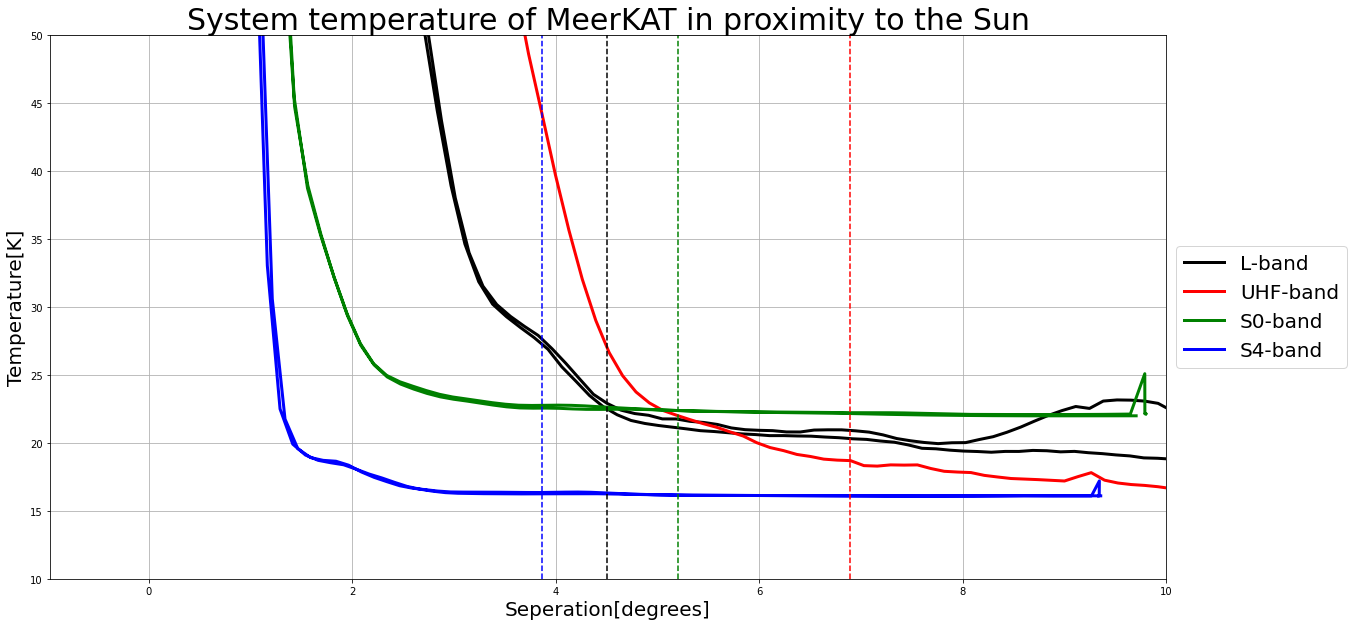

In [10]:
figure(figsize=(20, 10))
subplots_adjust(hspace=0.5)

pol = 'h'

plot(L_mean_angle, L_mean_temp, "-k", label='L-band', linewidth=3)
#errorbar(xv_L, yv_L, sv_L, fmt='ks',lw=2,capsize=4, capthick=2, zorder=3, mfc='b', mec='black',ecolor='r')

plot(U_mean_angle, U_mean_temp, "-r", label='UHF-band', linewidth=3)
#errorbar(xv_U, yv_U, sv_U, fmt='ks',lw=2,capsize=4, capthick=2, zorder=3, mfc='b', mec='black',ecolor='r')

plot(S0_mean_angle, S0_mean_temp, "-g", label='S0-band', linewidth=3)
#plot(angle_S4, temp_S4, ".g")
plot(S4_mean_angle, S4_mean_temp, "-b", label='S4-band', linewidth=3)

axvline(x = xnew_L, color='k', linestyle='--')
axvline(x = xnew_U, color='r', linestyle='--')
axvline(x = xnew_S0,  color='g', linestyle='--')
axvline(x = xnew_S4,  color='b', linestyle='--')

# axhline(y = median(yi_L), color='k', linestyle='--')
# axhline(y = median(yi_U), color='r', linestyle='--')
# axhline(y = median(yi_S0), color='g', linestyle='--')
# axhline(y = median(yi_S4), color='b', linestyle='--')

# axvspan(2.5, 4.5, 0,0.38,color='b',alpha=0.3)
# axvspan(4.5, 5.0, 0,0.5,color='g',alpha=0.3)
# axvspan(5, 7.5, 0,0.47,color='k',alpha=0.3)
# axvspan(7.5, 10, 0,0.40,color='r',alpha=0.3)

ylim(10, 50)
xlim(None, 10)

#ylim(0, )
#xlim(None, 15)
title('System temperature of MeerKAT in proximity to the Sun', fontsize=30)
xlabel('Seperation[degrees]', fontsize=20)
ylabel('Temperature[K]', fontsize=20)
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)
grid()
show()

In [11]:
print(min(U_mean_temp))

16.065389194915255


In [12]:
import pandas as pd

pol = 'V'
ant = rdb.ants[0]

nd_v = '/home/tmangena/jupyter_analysis/rx.l.4033.v.csv'
nd_h = '/home/tmangena/jupyter_analysis/rx.l.4033.h.csv'

dataset = scape.DataSet(rdb, baseline="%s" % (ant.name,), nd_h_model=nd_h, nd_v_model=nd_v)
print("This is type for dataset", type(dataset))
print("This is dataset", dataset)

data1 = dataset.select(flagkeep='~nd_on')
print("This is type for data1", type(data1))
print("This is data1", data1)
anle = {}
temp = {}

angle = np.sqrt(np.sum((np.degrees(data1.scans[0].target_coords))**2,axis=0))
temp[ant.name] = data1.scans[0].pol(2*pol.upper()).mean(axis=1) 

df = pd.DataFrame.from_dict(angle)
df1 = pd.DataFrame.from_dict(temp)

df.to_csv (r'angle.csv', index = False, header=True)
df1.to_csv (r'temp.csv', index = False, header=True)

NameError: name 'rdb' is not defined

In [ ]:
t = dataset.scans[1].data[:,:,0]
#f = dataset.scans[1].data[0,:,0]

print(t.max(), t.min())
#print(f.max(), f.min())
plot(np.average(t, axis=1))
#plot(t)
#plot(np.average(c, axis=1))
show()

In [ ]:
t = dataset.scans[1].data[:,0,0]
print(t.max(), t.min())
plot(t)
show()

In [ ]:
from operator import itemgetter



def ant_stats(ants, angle, temp):

    ant_temp = []
    ant_angle = []
    ant_std = {}
    ant_mean = {}
    for ant in ants:
        ant_std[ant] = std(temp[ant])
        ant_mean[ant] = mean(temp[ant])
        ant_temp.append(temp[ant])
        ant_angle.append(angle[ant])
    
    
    bin_temp = []
    bin_angle = []
    for i in range(178):
        bin_temp.append(list(map(itemgetter(i), ant_temp)))
        bin_angle.append(list(map(itemgetter(i), ant_angle)))

    mean_temp = []
    std_temp = []
    mean_angle = []
    for ind in range(178):
        m_t = mean(bin_temp[ind])
        s_t = std(bin_temp[ind])
        m_a = mean(bin_angle[ind])
        
        mean_temp.append(m_t)
        std_temp.append(s_t)
        mean_angle.append(m_a)
        
    mean_temp = array(mean_temp)
    std_temp = array(std_temp)
    mean_angle = array(mean_angle)
        
    return mean_temp, std_temp, mean_angle


In [13]:
angle_ = pd.read_csv('S4band_angle.csv')
temp_ = pd.read_csv('S4band_temp.csv')
ants = [rdb.ants[i].name for i in range(58)]

ants.remove('m060')
ants.remove('m002')
ants.remove('m004')
ants.remove('m007')
ants.remove('m013')
ants.remove('m020')
ants.remove('m024')
ants.remove('m026')
ants.remove('m041')
ants.remove('m050')
ants.remove('m056')
ants.remove('m058')



NameError: name 'rdb' is not defined

In [14]:
from operator import itemgetter



def ant_stats(ants, angle, temp):

    ant_temp = []
    ant_angle = []
    ant_std = {}
    ant_mean = {}
    for ant in ants:
        ant_std[ant] = std(temp[ant])
        ant_mean[ant] = mean(temp[ant])
        ant_temp.append(temp[ant])
        ant_angle.append(angle[ant])
    
    
    bin_temp = []
    bin_angle = []
    for i in range(178):
        bin_temp.append(list(map(itemgetter(i), ant_temp)))
        bin_angle.append(list(map(itemgetter(i), ant_angle)))

    mean_temp = []
    std_temp = []
    mean_angle = []
    for ind in range(178):
        m_t = mean(bin_temp[ind])
        s_t = std(bin_temp[ind])
        m_a = mean(bin_angle[ind])
        
        mean_temp.append(m_t)
        std_temp.append(s_t)
        mean_angle.append(m_a)
        
    mean_temp = array(mean_temp)
    std_temp = array(std_temp)
    mean_angle = array(mean_angle)
        
    return mean_temp, std_temp, mean_angle


In [15]:
nbins     = 20

#creating list of zeros using bin as size[x-values, y-values, standard deviation values]
xv       = zeros(nbins)
yv       = zeros(nbins)
sv       = zeros(nbins)

#calculating stats
mean_temp, std_temp, mean_angle = ant_stats(ants, angle_, temp_)

#creating values representing the x-axis 
bins     = linspace(min(mean_angle),max(mean_angle), nbins)
#print(bins)

#returning the indexes of all the values according to the binning
angle_ind  = digitize(mean_angle, bins) -1
#print(angle_ind)

NameError: name 'ants' is not defined

In [ ]:
#extracting all the values for each bin
dat = []
for k in range(nbins):
    xv[k] = mean(mean_angle[angle_ind==k])
    yv[k] = mean(mean_temp[angle_ind==k])
    sv[k] = std(mean_temp[angle_ind==k])

    dat.append([xv[k], yv[k], sv[k]])
dat = array(dat)

In [ ]:
print(xv)
print(yv)
print(sv)

In [ ]:
figure(figsize=(20, 10))
subplots_adjust(hspace=0.5)

median_ = median(mean_temp)
#print("The mean is : ", mean(mean_temp))
pol = 'h'

plot(mean_angle, mean_temp, "-k", label='average', linewidth=3)
errorbar(xv, yv, sv, fmt='ks',lw=2,capsize=4, capthick=2, zorder=3, mfc='b', mec='black',ecolor='r')
for index, ant in enumerate(ants):
    #plot(angle_[ant], temp_[ant], "*c", alpha=0.05)
    text(8, 45, 'Q1 = 19.45 K', fontsize = 15, color = 'g')
    text(8, 43, 'Median = 21.32 K', fontsize = 15, color = 'm')
    ylim(None, 50)
    xlim(None, 10)
    xlabel('Seperation[degrees]', fontsize=20)
    ylabel('Temperature[K]', fontsize=20)
    title('System temperature of MeerKAT in proximity to the Sun', fontsize=30)
    legend(loc='center left', bbox_to_anchor=(1, 0.5))
grid()
show()

In [16]:
angle_ = pd.read_csv('S4band_angle.csv')
temp_ = pd.read_csv('S4band_temp.csv')
ants = [rdb.ants[i].name for i in range(58)]

ants.remove('m060')
ants.remove('m002')
ants.remove('m004')
ants.remove('m007')
ants.remove('m013')
ants.remove('m020')
ants.remove('m024')
ants.remove('m026')
ants.remove('m041')
ants.remove('m050')
ants.remove('m056')
ants.remove('m058')

for index, ant in enumerate(ants):
    if temp_[ant].max() > 400:
        rm.append(ant)
        temp_.pop(ant)
    
    plot(angle_[ant], temp_[ant], "*c", alpha=0.05)
    
show()

NameError: name 'rdb' is not defined

In [17]:
def modelTcal(noisefile):
    ##Read data from file
    fin = open(noisefile, 'r')
    # Read and ignore header line
    fin.readline()
    fin.readline()
    # Read model data [freq Hz, Te K]
    nd_freqs = []
    nd_temps = []
    for line in fin.readlines():
        try:
            noisemodel= numpy.array(line.strip().split(','), dtype=float)
        except: print(line.strip())
        nd_freqs.append(noisemodel[0])
        nd_temps.append(noisemodel[1])
    fin.close()
    nd_freqs = numpy.array(nd_freqs)
    nd_temps = numpy.array(nd_temps)
    return [nd_freqs, nd_temps]

    [nd_freqs, nd_temps] = modelTcal(os.path.join(nd_models,nd_file))
    Tsys = numpy.mean(nd_temps)

In [18]:
[nd_freqs, nd_temps] = modelTcal(nd_v)

NameError: name 'nd_v' is not defined

In [19]:
r = rdb.select(ants=ant.name,corrprods='auto',scans='scan')
print(r)

scan_indices = rdb.scan_indices

print(scan_indices)

NameError: name 'rdb' is not defined

In [ ]:
rdb.select()
target = rdb.catalogue.targets[0].name
passband = rdb.channel_freqs
ants = rdb.ants
# Boltzman constant
k = 1.38e-23

for ant_idx in range(len(ants)):
    ant = ants[ant_idx]
    print('Observation data for antenna %s' % ant.name)
    
    # approximate Tsys using Tant values from model files
    nd_file=nd_h
    [nd_freqs, nd_temps] = modelTcal(noisefile)
    Tsys = numpy.mean(nd_temps)

    
    Ssys = 10.*numpy.log10(k*Tsys) + 30 # dBm/Hz
    print("Expected power spectral density of the system noise floor %.2d [dBm/Hz]" % Ssys)
    
    rdb.select()
    rdb.select(ants=ant.name,corrprods='auto',scans='scan')
    scan_indices = rdb.scan_indices
    
    for idx in range(len(scan_indices)):
        rdb.select(scans=scan_indices[idx])
        d = scape.DataSet(rdb, baseline="%s" % (ant.name,))
        if not d is None:
            d = d.select(flagkeep='~nd_on')
        data = d.scans[0].data[:,:,0]

        # power calibration scale factor
        buff_chan = len(passband)/10
        bp_floor =  (10*numpy.log10(numpy.median(numpy.abs(data), axis=0)))[int(buff_chan):-int(buff_chan)].mean()
        delta_P = bp_floor - Ssys
        
        plt.figure(2*ant_idx,figsize = (15,5))
        plt.plot(passband/1e6, 10*numpy.log10(numpy.median(numpy.abs(data), axis=0))-delta_P, label='Scan %d'%idx)       
        plt.axis('tight')
        plt.xlabel('Feq [MHz]')
        plt.ylabel('Power [dBm/ch]')
        plt.title('Observation Spectrum %s'%ant.name)
        plt.legend(loc=0)
        plt.figure(2*ant_idx+1,figsize = (15,5))
        plt.subplot(1,3,idx+1)
        plt.plot(10*numpy.log10(numpy.median(numpy.abs(data), axis=1)))
        plt.axis('tight')
        plt.xlabel('Scans [#]')
        plt.ylabel('Power [arb dBm]')
        plt.title('Observation Scans %d'%idx)
        plt.subplots_adjust(wspace=None, hspace=None)

In [20]:
passband = rdb.channel_freqs
buff_chan = len(passband)/10
print(int(buff_chan))

NameError: name 'rdb' is not defined

In [ ]:
dataset = scape.DataSet(rdb, baseline="%s" % (ant.name,), nd_h_model=nd_h, nd_v_model=nd_v)
d = dataset.convert_power_to_temperature(freq_width=0.0)

dat = d.select(flagkeep='~nd_on')
dat.average(channels_per_band=None)

data = dat.scans[0].data[:,:,0]

print(data)


plt.plot(data)
plt.show()




In [ ]:
dataset.scans[0].data?

In [142]:
plt.plot(np.average(dataset.scans[0], axis=(0,2)))
plt.show()

AxisError: axis 0 is out of bounds for array of dimension 0

In [19]:
import warnings

def load_cal(filename, hnd, vnd):
    """ Load the dataset into memory """
    print('Loading noise diode models')

    try:
        d = scape.DataSet(filename, nd_models=hnd)
    except IOError:
        nd = scape.gaincal.NoiseDiodeModel(freq=[1,20000],temp=[20,20])
        warnings.warn('Warning: Failed to load/find Noise Diode Models, setting models to 20K ')
        print('Warning: Failed to load/find Noise Diode Models, setting models to 20K ')
        d = scape.DataSet(filename,  nd_h_model = hnd, nd_v_model = vnd)


#     if not channel_range is None :
#         start_freq_channel = int(channel_range.split(',')[0])
#         end_freq_channel = int(channel_range.split(',')[1])
#         edge = np.tile(True, n_chan)
#         edge[slice(start_freq_channel, end_freq_channel)] = False
#     else :
#         edge = np.tile(False, n_chan)
#     #load static flags if pickle file is given
#     if len(channel_mask)>0:
#         pickle_file = open(channel_mask,mode='rb')
#         rfi_static_flags = pickle.load(pickle_file)
#         pickle_file.close()
#     else:
#         rfi_static_flags = np.tile(False, n_chan)

#     static_flags = np.logical_or(edge,rfi_static_flags)
    
#     #d = d.select(freqkeep=~static_flags)
#     freq_channel_flagged = []
#     for band in freq_channel:
#         tmp_band = []
#         for channel in band :
#             if not static_flags[channel] : # if not flagged
#                 tmp_band.append(channel)
#         #if len(tmp_band) > 0 :
#         freq_channel_flagged.append(tmp_band)

    #if not freq_channel is None :
    #    d = d.select(freqkeep=freq_channel)
    #print "Flagging RFI"
    #sd = remove_rfi(d,width=7,sigma=5)  # rfi flaging Needed ?
    print("Converting to Temperature")
    print("Plotting the number of channels in each band of the list of lists freq_channel_flagged will be useful")
    d = d.convert_power_to_temperature(freq_width=0.0)
    if not d is None:
        d = d.select(flagkeep='~nd_on')
        #d = d.select(labelkeep='track', copy=False)
        d.average(channels_per_band=None)
    return d

Loading noise diode models
INFO: Loading single-dish baseline 'm047,m047'
INFO: Defaulting to 'coupler' noise diode (either no or both diodes are firing)
INFO: Loading single-dish baseline 'm047,m047'
INFO: Defaulting to 'coupler' noise diode (either no or both diodes are firing)
DEBUG: Resetting dropped connection: archive-gw-1.kat.ac.za
DEBUG: Resetting dropped connection: archive-gw-1.kat.ac.za
DEBUG: Resetting dropped connection: archive-gw-1.kat.ac.za
DEBUG: Resetting dropped connection: archive-gw-1.kat.ac.za
DEBUG: Resetting dropped connection: archive-gw-1.kat.ac.za
DEBUG: Resetting dropped connection: archive-gw-1.kat.ac.za
DEBUG: Resetting dropped connection: archive-gw-1.kat.ac.za
DEBUG: Resetting dropped connection: archive-gw-1.kat.ac.za
DEBUG: Resetting dropped connection: archive-gw-1.kat.ac.za
DEBUG: Resetting dropped connection: archive-gw-1.kat.ac.za
DEBUG: Resetting dropped connection: archive-gw-1.kat.ac.za
DEBUG: Resetting dropped connection: archive-gw-1.kat.ac.za

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Warning: Failed to load/find Noise Diode Models, setting models to 20K 
  # This is added back by InteractiveShellApp.init_path()


DEBUG: http://archive-gw-1.kat.ac.za:7480 "GET /1657099540-sdp-l0/correlator_data/00032_00000_00000.npy HTTP/1.1" 200 262272
DEBUG: http://archive-gw-1.kat.ac.za:7480 "GET /1657099540-sdp-l0/correlator_data/00000_00000_00000.npy HTTP/1.1" 200 262272
DEBUG: http://archive-gw-1.kat.ac.za:7480 "GET /1657099540-sdp-l0/correlator_data/00000_00256_00000.npy HTTP/1.1" 200 262272
DEBUG: http://archive-gw-1.kat.ac.za:7480 "GET /1657099540-sdp-l0/correlator_data/00000_00512_00000.npy HTTP/1.1" 200 262272
DEBUG: http://archive-gw-1.kat.ac.za:7480 "GET /1657099540-sdp-l0/correlator_data/00032_00768_00000.npy HTTP/1.1" 200 262272
DEBUG: http://archive-gw-1.kat.ac.za:7480 "GET /1657099540-sdp-l0/correlator_data/00064_00000_00000.npy HTTP/1.1" 200 131200
DEBUG: http://archive-gw-1.kat.ac.za:7480 "GET /1657099540-sdp-l0/correlator_data/00032_00512_00000.npy HTTP/1.1" 200 262272
DEBUG: http://archive-gw-1.kat.ac.za:7480 "GET /1657099540-sdp-l0/correlator_data/00032_00256_00000.npy HTTP/1.1" 200 262272


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


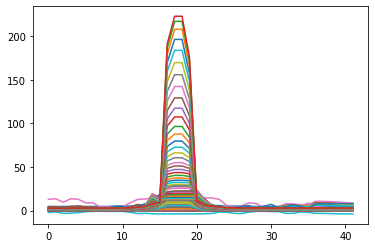

In [20]:
data_ = load_cal(rdb, nd_v, nd_h)

data1 = data_.scans[0].data[:,:,0]


plt.plot(data1)
plt.show()